In [1]:
import statistics
import numpy as np

np.random.seed(42)

In [2]:
arr = np.random.randint(low=1, high=100, size=10)

In [3]:
arr.dtype

dtype('int64')

In [4]:
arr = arr.astype(np.int16)

In [5]:
arr.dtype

dtype('int16')

In [6]:
arr

array([52, 93, 15, 72, 61, 21, 83, 87, 75, 75], dtype=int16)

## Mean

In [7]:
%time statistics.mean(arr)

CPU times: user 288 µs, sys: 35 µs, total: 323 µs
Wall time: 333 µs


63

In [8]:
# fmean() convert data to floats and compute the arithmetic mean
# This runs faster than mean
%time statistics.fmean(arr)

CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 34.1 µs


63.4

In [9]:
# Geometric mean
statistics.geometric_mean(arr)

55.388283306737776

In [10]:
# Harmonic Mean
statistics.harmonic_mean(arr)

44.49178063173757

## Median

In [11]:
statistics.median(arr)

73.5

In [12]:
# median_low() returns the lower median
statistics.median_low(arr)

72

In [13]:
# median_high() returns the higher median
statistics.median_high(arr)

75

`median_grouped(data, interval=1)`

    Return the median of grouped continuous data, calculated as the 50th percentile, using interpolation.
    
$ Median = l + \frac{\frac{N}{2} - F}{f} * h $ 

where 

l = lower limit of the median class

f = frequency of the median class

F = cumulative frequency of the class preceding the median class

N = total number of observations

h = width of the median class

In [14]:
statistics.median_grouped(arr)

74.5

In [15]:
statistics.median_grouped(data=arr, interval=2)

74.0

## Mode

In [16]:
statistics.mode([1, 1, 2, 3, 3, 3, 3, 4])

3

In [17]:
statistics.mode('mississippi')

'i'

In [18]:
statistics.multimode('aabbbccccddddeeeeffffgggg')

['c', 'd', 'e', 'f', 'g']

## Standard deviation and Variance

In [50]:
population = np.random.randint(low=1, high=10000, size=100000)
sample = np.random.choice(a=population, size=2000)

In [51]:
sample

array([6238, 7464, 8690, ..., 9214, 3351, 7989])

In [52]:
statistics.multimode(sample)

[2726, 2022]

#### Population Standard Deviation
`statistics.pstdev(daat, mu=None)`

In [53]:
statistics.pstdev(population)

2885.7858548409304

#### Population Variance
`statistics.pvariance(data, mu=None)`

If the optional second argument mu is given, it is typically the mean of the data. It can also be used to compute the second moment around a point that is not the mean. If it is missing or None (the default), the arithmetic mean is automatically calculated.

In [54]:
statistics.pvariance(population)

8327760

#### Sample Standard Deviation
`statistics.stdev(data, xbar=None)`

In [55]:
statistics.stdev(sample)

2859.109826501948

#### Sample Variance
`statistics.variance(data, xbar=None)`

In [56]:
statistics.variance(sample)

8174509

## Quantiles
` statistics.quantiles(data, *, n=4, method='exclusive')`

In [57]:
statistics.quantiles(sample)

[2461.25, 5026.0, 7363.5]

## Normal Distribution objects
NormalDist is a tool for creating and manipulating normal distributions of a random variable. It is a class that treats the mean and standard deviation of data measurements as a single entity.

`class statistics.NormalDist(mu=0.0, sigma=1.0)`

`classmethod from_samples(data)`

Makes a normal distribution instance with mu and sigma parameters estimated from the data using fmean() and stdev().

In [58]:
normal = statistics.NormalDist.from_samples(population)

In [59]:
normal.mean

5013.43556

In [60]:
normal.median

5013.43556

In [61]:
normal.mode

5013.43556

In [62]:
normal.variance

8327844.202009506

In [63]:
normal.stdev

2885.800443899319

`samples(n, *, seed=None)`

Generates n random samples for a given mean and standard deviation. Returns a list of float values.

In [66]:
normal_sample = normal.samples(2000, seed=42)

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

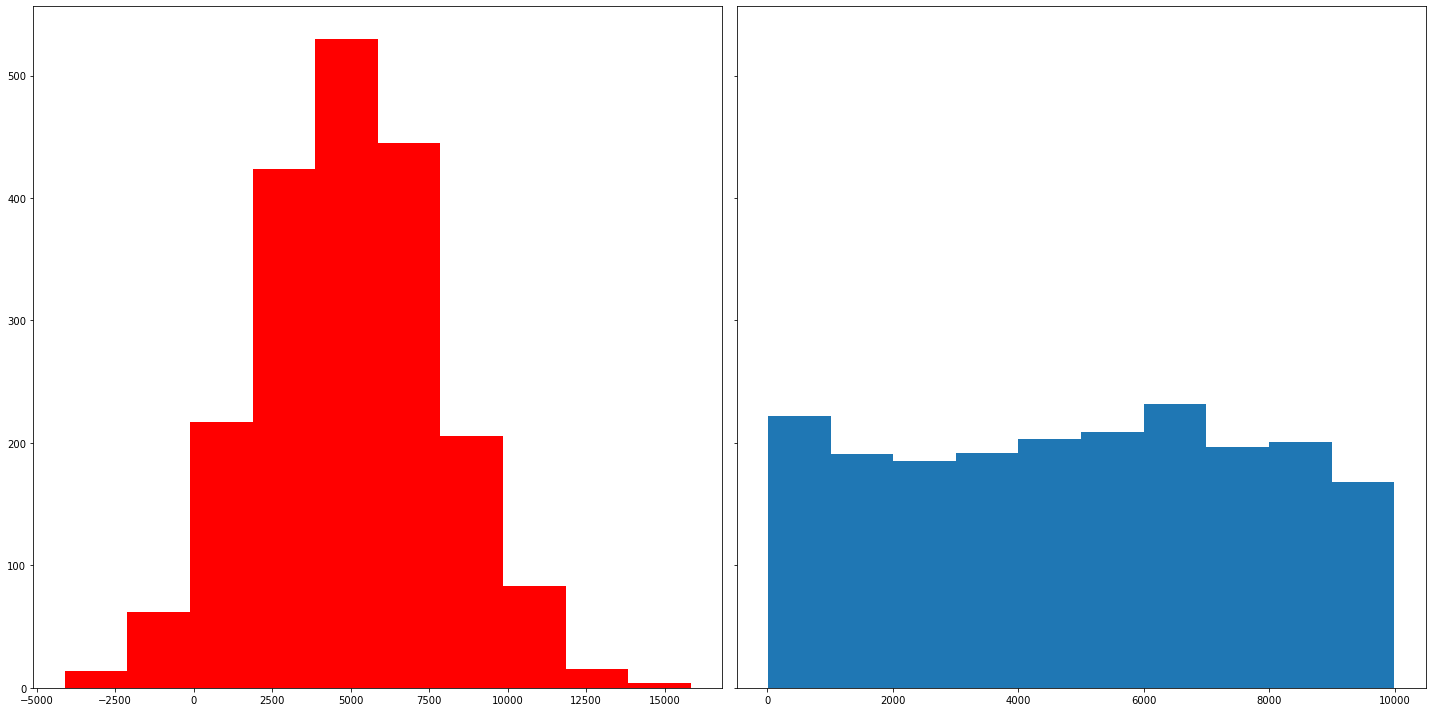

In [79]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(20, 10))

axs[1].hist(sample, label="Uniform Distribution by default")
plt.show()

` pdf(x)`

Using a probability density function (pdf), compute the relative likelihood that a random variable X will be near the given value x. Mathematically, it is the limit of the ratio P(x <= X < x+dx) / dx as dx approaches zero.

In [80]:
normal.pdf(2000)

8.014261028494143e-05

` cdf(x)`

Using a cumulative distribution function (cdf), compute the probability that a random variable X will be less than or equal to x. Mathematically, it is written P(X <= x).

In [81]:
normal.cdf(2000)

0.14818980266820392

` inv_cdf(p)`

Compute the inverse cumulative distribution function, also known as the quantile function or the percent-point function. Mathematically, it is written x : P(X <= x) = p.

In [83]:
normal.inv_cdf(0.14818980266820392)

1999.999999999999